# Heart Failure Prediction

In this notebook, we will analyze the heart failure clinic dataset from Kaggle, and build a model that predicts whether a person will die from heart failure or not.

To start with, we will import all the neccessary modules for our analysis - pandas, numpy, matplotlib and seaborn.


In [1]:
#import the neccessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
heart_df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Exploratory Data Analysis (EDA)

Our dataset has now been successfully loaded. Now, we have to check for missing data and confirm that all columns are of the right data type - numerical. To do this, we will use some pandas methods.

Also, we will explore our data and derive some basic insights using statistical methods.

In [3]:
# check the datatypes of each columns
heart_df.info()

# check if there's any missing data from each column
heart_df.isnull().any()

# perform exploratory analysis on our dataset to get insights on its distribution
heart_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Preprocessing The Data

There are no missing data, and our columns are of the right data type - numerical. Therefore, we do not have to worry about handling missing data or type conversion.

Going forward, we will split our data into train and test split, and separate our features from target variables.

On inspecting the data and the result from calling the info method on our dataset, we will observe that certain columns - time, age, ejection_fraction, creatinine_phosphokinase, serum_sodium - are of bigger range. To prevent our model from being biased towards these columns, we standardize these columns.


In [5]:
# import train_test_split
from sklearn.model_selection import train_test_split

# import StandardScalerto standardize our data
from sklearn.preprocessing import StandardScaler

# define the features (X) and target (y)
X = heart_df.iloc[:, :-1]
y = heart_df.iloc[:, -1]

# initialize standardscalar
scalar = StandardScaler()

# fit_transform certain columns to standardize them
X['ejection_fraction'] = scalar.fit_transform(X.ejection_fraction.values.reshape(-1,1))
X['age'] = scalar.fit_transform(X.age.values.reshape(-1,1))
X['creatinine_phosphokinase'] = scalar.fit_transform(X.creatinine_phosphokinase.values.reshape(-1,1))
X['platelets'] = scalar.fit_transform(X.platelets.values.reshape(-1,1))
X['serum_sodium'] = scalar.fit_transform(X.serum_sodium.values.reshape(-1,1))
X['time'] = scalar.fit_transform(X.time.values.reshape(-1,1))

#split our dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.3)

## Making Predictions And Evaluating Performance

Our data is ready for use. We are now to build a high-performance model for the data.

On inspection, we will notice that our prediction is binary - that is our data can only be one of two categories - 0 or 1.Therefore, Logistic Regression would be a good algorithm to build our model on.

In [6]:
# import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

In [7]:
# initialize logistic regression and fit our data on it
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [8]:
# let's make predictions on unseen data
y_pred= logreg.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [9]:
# print the accuracy of our classifier
print("Accuracy of logistic regression classifier: ", logreg.score(X_test, y_test))

Accuracy of logistic regression classifier:  0.7888888888888889


#### Our accuracy score is approximately 79%, which shows that our model does a pretty good job. To get more insights about the accuracy of our model,we will construct a classification report and confusion matrix.



In [13]:
# import confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[50  3]
 [16 21]]
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        53
           1       0.88      0.57      0.69        37

    accuracy                           0.79        90
   macro avg       0.82      0.76      0.76        90
weighted avg       0.81      0.79      0.78        90



<AxesSubplot:>

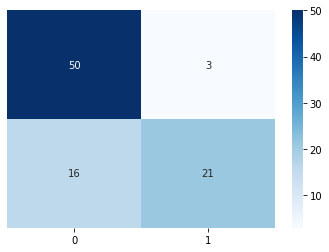

In [19]:
sns.heatmap(confusion_matrix(y_test, y_pred), yticklabels = False, cmap = 'Blues', annot= True)